       age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   

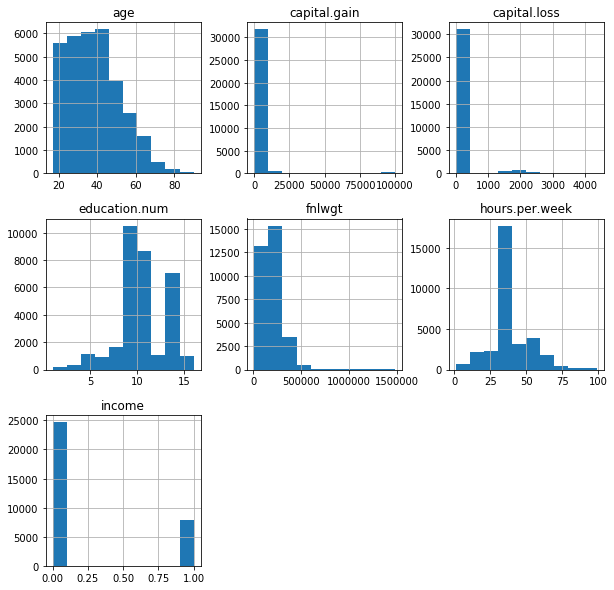

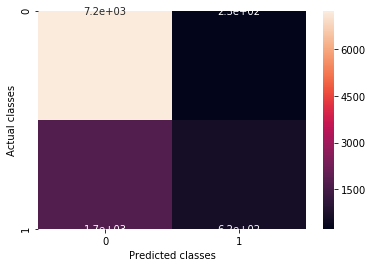

In [2]:
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# reading csv file
data = pd.read_csv("C:/Users/subar/Downloads/CMPE-255 Sec 99 - Data Mining/Home Works/\HW2_Submission/adult_census_income.csv")

print(data)

# iterating the columns
for col in data.columns:
    print(col)
'''
# convert to numeric
for x in range(0, 13):
    data.iloc[:, x] = pd.to_numeric(data.iloc[:, x])
'''

# Change Y values to 1's and 0's
data['income'] = np.where(data['income'] == '>50K', 1, 0)
data['income'] = data['income'].astype('int64')
print(data)

numAttributes = data.select_dtypes(include=['int64'])
print('Number valued columns:', numAttributes.columns)
data = data.select_dtypes(include=['int64'])

# Histogram visualization of data
data.hist(figsize=(10,10))

# Train data details
print('Describe data:', data)


# Prep Training and Test data.
trainData, testData = train_test_split(data, train_size=0.7, random_state=100)
print(trainData.info())
print('Total data count:', len(data))
print('Training data count:',len(trainData))
print('Test data count:',len(testData))


# Class distribution of train data
print('Class distribution of training data:',trainData.income.value_counts())

# Separate majority and minority classes
trainData_majority = trainData[trainData.income == 0]
trainData_minority = trainData[trainData.income == 1]

# Downsample majority class
trainData_downsampled = resample(trainData_majority,
                                 replace=False,     # sample without replacement
                                 n_samples=len(trainData_minority),     # to match minority class
                                 random_state=100)  # reproducible results

# Combine minority class with downsampled majority class
down_train = pd.concat([trainData_downsampled, trainData_minority])


# Build Logistic Model with down sampled data
X_traindown = trainData.loc[:, trainData.columns != 'income']
Y_traindown = trainData.income
#print(down_train)
X_testdown = testData.loc[:, testData.columns != 'income']
Y_testdown = testData.income
Downlogmodel = LogisticRegression()
Downlogmodel.fit(X_traindown,Y_traindown)
predictionsDown = Downlogmodel.predict(X_testdown)

# Accuracy calculation
print('Accuracy with down sampled data:',(accuracy_score(Y_testdown, predictionsDown) * 100) ,"%")

#Confusion Matrix
cfm = confusion_matrix( Y_testdown.values, predictionsDown)
print("Confusion Matrix", cfm)
plt.show()
sns.heatmap(cfm, annot=True)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
plt.show()




